# Informasi Pribadi

Nama : Muhamad Faqih

Nim  : 054393441

Prodi: Sains Data

# Import Library

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind

# Data Loading

In [45]:
df = pd.read_excel('/content/data soal UAS 2024.2 Urgensi.xlsx')
df.head()

,Usia,Tinggi Badan,Berat Badan,Jenis Kelamin,Merokok,Tingkat Obesitas
0,21,162,64,Perempuan,tidak,Normal
1,21,152,56,Perempuan,ya,Normal
2,23,180,77,Laki-laki,tidak,Normal
3,27,180,87,Laki-laki,tidak,Overweight 1
4,29,162,53,Laki-laki,tidak,Normal


# Data Wrangling

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Usia              100 non-null    int64 
 1   Tinggi Badan      100 non-null    int64 
 2   Berat Badan       100 non-null    int64 
 3   Jenis Kelamin     100 non-null    object
 4   Merokok           100 non-null    object
 5   Tingkat Obesitas  100 non-null    object
dtypes: int64(3), object(3)
memory usage: 4.8+ KB


In [48]:
# memeriksa dimensi data
df.shape

(100, 6)

In [49]:
# memeriksa nilai unik setiap kolom
print("Usia:", df['Usia'].unique())
print("Tinggi Badan:", df['Tinggi Badan'].unique())
print("Berat Badan:", df['Berat Badan'].unique())
print("Jenis Kelamin:", df['Jenis Kelamin'].unique())
print("Merokok:", df['Merokok'].unique())
print("Tingkat Obesitas:", df['Tingkat Obesitas'].unique())


Usia: [21 23 27 29 22 24 26 41 30 52 20 19 31 39 17 25 55 38]
Tinggi Badan: [162 152 180 150 164 178 172 185 165 177 170 193 153 171 169 160 175 168
 158 179 156 167 166 181 182 155 163 176 161]
Berat Badan: [ 64  56  77  87  53  55  68 105  80  99  60  66 102  78  82  70  50  65
  52  76  83  90  62  49  48  67  88  75  72  44  58  57  69  95 112  85
  45  91  93  84  42  63]
Jenis Kelamin: ['Perempuan' 'Laki-laki']
Merokok: ['tidak' 'ya']
Tingkat Obesitas: ['Normal' 'Overweight 1' 'Obesitas 1' 'Overweight 2' 'Kurus' 'Obesitas 2']


In [50]:
# memeriksa duplikasi data
print("Jumlah duplikasi data:", df.duplicated().sum())

Jumlah duplikasi data: 1


In [51]:
duplikat = df[df.duplicated()]
print("Data yang duplikat:")
print(duplikat)

Data yang duplikat:
    Usia  Tinggi Badan  Berat Badan Jenis Kelamin Merokok Tingkat Obesitas
94    21           152           42     Perempuan   tidak            Kurus


In [52]:
# memeriksa missing value
print("Jumlah missing value:")
print(df.isnull().sum())

Jumlah missing value:
Usia                0
Tinggi Badan        0
Berat Badan         0
Jenis Kelamin       0
Merokok             0
Tingkat Obesitas    0
dtype: int64


# EDA

Obesitas adalah kondisi berat badan melebihi batas normal karena adanya penumpukan lemak
berlebih di dalam tubuh. Obesitas terjadi karena asupan kalori lebih banyak dibandingkan jumlah
kalori yang dibakar, sehingga tubuh akan menyimpan kalori yang tidak digunakan dalam bentuk
lemak. Salah satu hal yang dapat memicu terjadinya obesitas adalah sedentary lifestyle, yakni pola
hidup yang membuat seseorang jarang melakukan aktivitas fisik sehingga pembakaran kalori dalam
tubuhnya cenderung rendah. Suatu kajian dilakukan untuk mengetahui level obesitas dari
sekelompok komunitas. Berdasarkan data berupa jenis kelamin, usia, tinggi badan, berat badan,
kebiasaan merokok, dan level obesitas sebagaimana disajikan pada https://sl.ut.ac.id/2339 , maka

### Soal 1:Hitunglah ukuran pemusatan (Mean, Median, dan Mode) dan penyebaran (Range, Variance, dan Standard Deviation) dari tinggi badan

### Soal 2:Tentukanlah bentuk distribusi data tinggi berdasarkan histogram serta ukuran Symmetry,Skewness, dan Kurtosis.


### Soal 3:Lakukan uji kesamaan mean tinggi badan laki-laki dan perempuan pada tingkat signifikansi a=5%, jika diasumsikan mempunyai varians yang sama. Berikan kesimpulan Anda!


### Soal 4:Lakukan analisis visual tentang level obesitas berdasarkan scatter plot antara usia-tinggi badan dan bar chart mean tinggi badan untuk setiap level obesitas antara laki-laki dan perempuan. Berikan ulasan Anda

### Jawab

In [53]:
# Soal 1: Ukuran pemusatan data
mean = df['Tinggi Badan'].mean()
median = df['Tinggi Badan'].median()
mode = df['Tinggi Badan'].mode()[0]

# Penyebaran data
range = df['Tinggi Badan'].max() - df['Tinggi Badan'].min()
variance = df['Tinggi Badan'].var()
std_dev = df['Tinggi Badan'].std()

print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Range:", range)
print("Variance:", variance)
print("Standard Deviation:", std_dev)


Mean: 167.42
Median: 166.0
Mode: 165
Range: 43
Variance: 83.09454545454541
Standard Deviation: 9.115620958253222


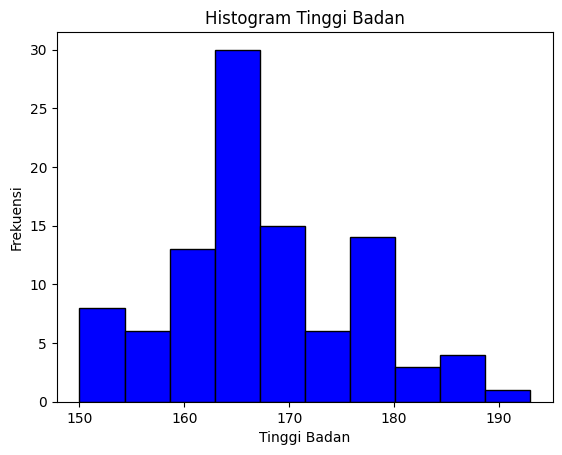

Skewness: 0.2884716014272229
Kurtosis: -0.20912742714451227


In [54]:
# Soal 2: Distribusi data tinggi berdasarkan histogram serta ukuran Symmetry,Skewness, dan Kurtosis.
plt.hist(df['Tinggi Badan'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram Tinggi Badan')
plt.xlabel('Tinggi Badan')
plt.ylabel('Frekuensi')
plt.show()

# Symmetry,Skewness, dan Kurtosis
skewness = df['Tinggi Badan'].skew()
kurtosis = df['Tinggi Badan'].kurt()

print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

### Interpretasi Soal 2:

---

* Nilai Skewness: 0.288.Nilai ini menunjukkan bahwa distribusi data sedikit miring ke kanan (positif).Meskipun nilai skewness tidak terlalu besar, data tidak sepenuhnya simetris.
Artinya, ada sedikit lebih banyak data pada sisi kiri rata-rata, atau ekor kanan sedikit lebih panjang.

---

* Nilai Kurtosis: -0.209.Nilai kurtosis yang mendekati 0 dan sedikit negatif menunjukkan bahwa distribusi data lebih datar (platykurtic) dibandingkan distribusi normal.Ini berarti puncak distribusi data lebih rendah dan lebih lebar daripada distribusi normal.

* Symetri:Skewness mendekati 0 (0.288) menunjukkan bahwa distribusi data hampir simetris, meskipun ada sedikit kemiringan ke kanan.
Secara praktis, distribusi ini bisa dianggap cukup simetris karena nilai skewness tidak terlalu jauh dari 0.

Kesimpulan:Distribusi data tidak sepenuhnya simetris, tetapi memiliki kemiringan kecil ke kanan yang tidak terlalu signifikan untuk mempengaruhi analisis dalam banyak kasus.

### Soal 3:Melakukan uji hipotesis dua sampel (independent t-test)

---

* Hipotesis Nol(H0):Tidak ada perbedaan rata-rata tinggi badan antara laki-laki dan perempuan.
* Hipotesis Alternatif(Ha):Ada perbedaan rata-rata tinggi badan antara laki-laki dan perempuan.


In [55]:
# Soal 3:uji kesamaan mean tinggi badan laki-laki dan perempuan pada tingkat signifikansi a=5%, jika diasumsikan mempunyai varians yang sama.
# Memisahkan data berdasarkan jenis kelamin
male_height = df[df['Jenis Kelamin'] == 'Laki-laki']['Tinggi Badan']
female_height = df[df['Jenis Kelamin'] == 'Perempuan']['Tinggi Badan']

# Melakukan t-test
t_stat, p_value = ttest_ind(male_height, female_height, equal_var=True)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Statistic: 7.987610214587136
P-Value: 2.696095189971042e-12


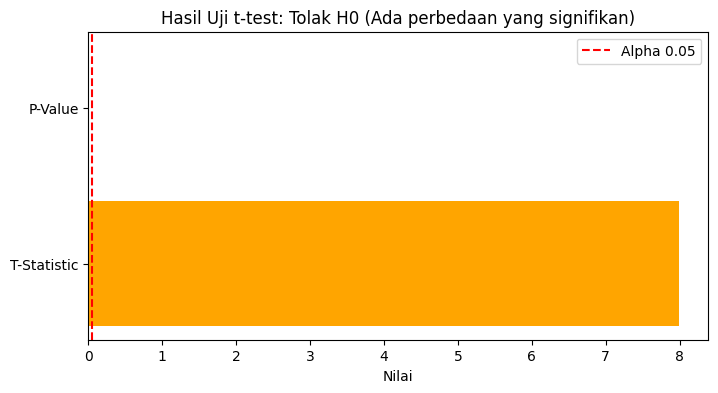

In [56]:
# Menampilkan keputusan uji berdasarkan p-value
alpha = 0.05
decision = "Tolak H0 (Ada perbedaan yang signifikan)" if p_value < alpha else "Gagal tolak H0 (Tidak ada perbedaan yang signifikan)"

# Visualisasi p-value
plt.figure(figsize=(8, 4))
plt.barh(['T-Statistic', 'P-Value'], [t_stat, p_value], color='orange')
plt.axvline(x=alpha, color='red', linestyle='--', label='Alpha 0.05')

# Memberikan label
plt.title(f'Hasil Uji t-test: {decision}')
plt.xlabel('Nilai')
plt.legend()
plt.show()

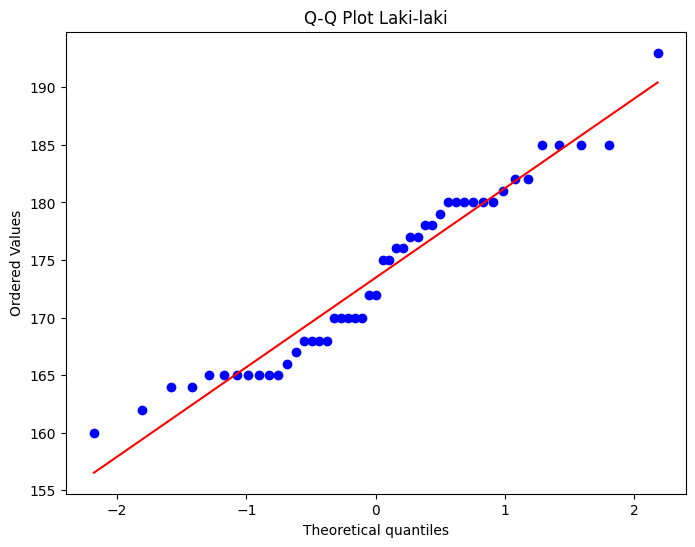

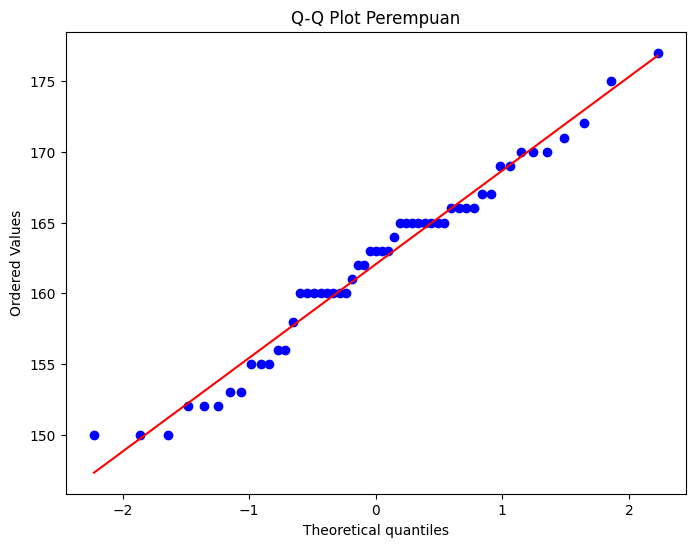

In [57]:
# Q-Q Plot untuk tinggi badan laki-laki
plt.figure(figsize=(8, 6))
stats.probplot(male_height, dist="norm", plot=plt)
plt.title('Q-Q Plot Laki-laki')
plt.show()

# Q-Q Plot untuk tinggi badan perempuan
plt.figure(figsize=(8, 6))
stats.probplot(female_height, dist="norm", plot=plt)
plt.title('Q-Q Plot Perempuan')
plt.show()


### Interpretasi Soal 3:

---
* T-Statistic yang besar (7.99) menunjukkan bahwa perbedaan antara rata-rata tinggi badan sangat besar jika dibandingkan dengan variasi dalam data.
* P-Value yang sangat kecil memperkuat argumen bahwa perbedaan ini sangat signifikan, memberikan bukti kuat bahwa rata-rata tinggi badan antara laki-laki dan perempuan tidak sama.


---

Karena P-Value = 2.70e-12 < 0.05, kita menolak hipotesis nol (H0) yang menyatakan bahwa tidak ada perbedaan rata-rata tinggi badan antara laki-laki dan perempuan.

Dengan demikian, hasil uji ini menyatakan bahwa ada perbedaan yang sangat signifikan dalam rata-rata tinggi badan antara laki-laki dan perempuan pada tingkat signifikansi 5%. Perbedaan ini sangat besar,sekian.


<ipython-input-59-bc2a1d768f2c>:28: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(subgroup['Usia'], subgroup['Tinggi Badan'],


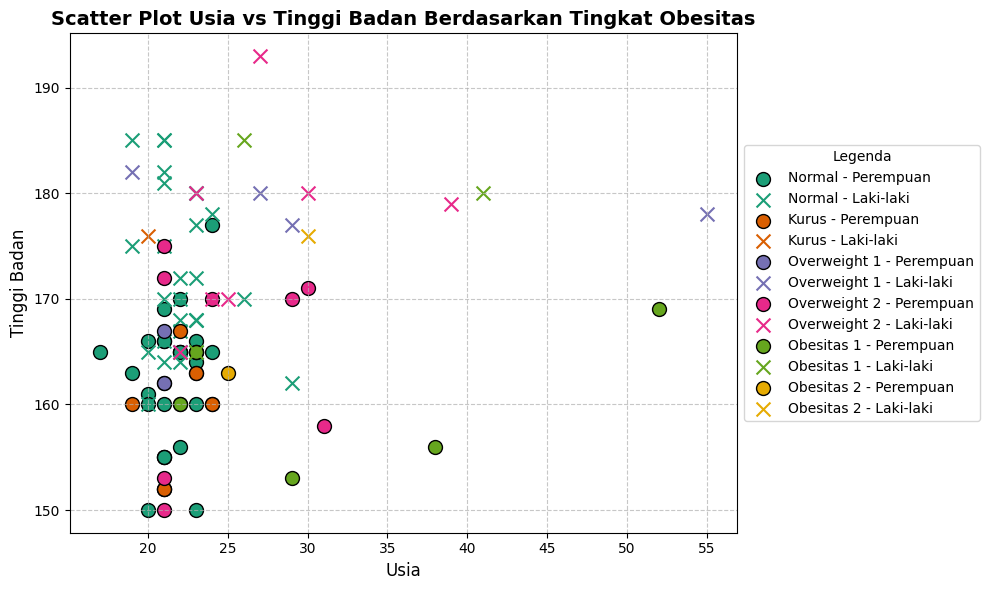

<ipython-input-59-bc2a1d768f2c>:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Tingkat Obesitas', y='Tinggi Badan', hue='Jenis Kelamin', ci=None)


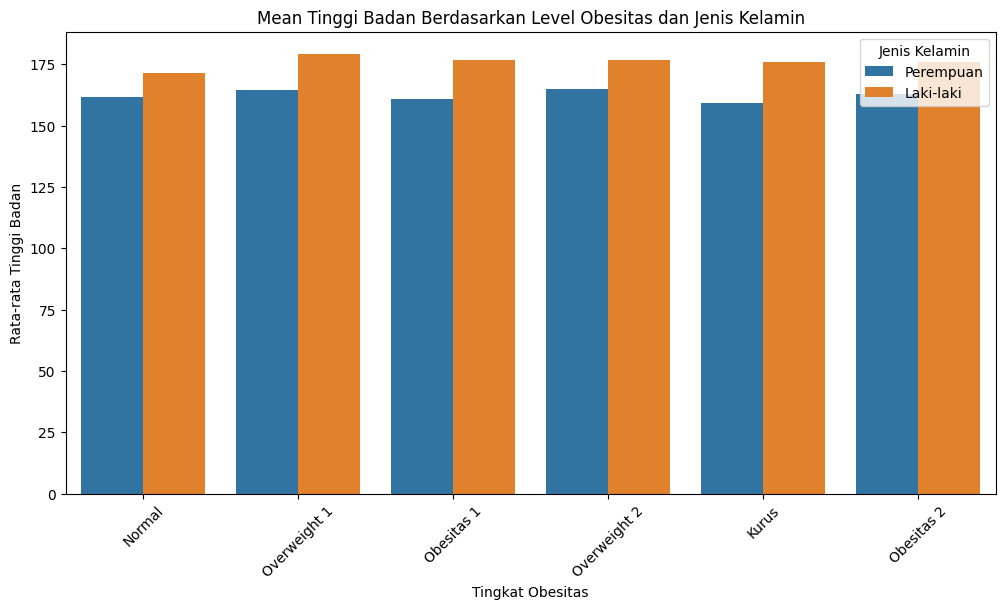

In [59]:
# Mapping warna untuk Tingkat Obesitas
color_map = {
    'Normal': '#1b9e77',
    'Kurus': '#d95f02',
    'Overweight 1': '#7570b3',
    'Overweight 2': '#e7298a',
    'Obesitas 1': '#66a61e',
    'Obesitas 2': '#e6ab02'
}

# Mapping marker untuk Jenis Kelamin
marker_map = {
    'Perempuan': 'o',
    'Laki-laki': 'x'
}

# Menentukan urutan legenda untuk tingkat obesitas
urutan_obesitas = ['Normal', 'Kurus', 'Overweight 1', 'Overweight 2', 'Obesitas 1', 'Obesitas 2']

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot dengan kolom 'Tingkat Obesitas' dan 'Jenis Kelamin'
for obesitas in urutan_obesitas:
    group = df[df['Tingkat Obesitas'] == obesitas]
    for gender in ['Perempuan', 'Laki-laki']:
        subgroup = group[group['Jenis Kelamin'] == gender]
        ax.scatter(subgroup['Usia'], subgroup['Tinggi Badan'],
                   label=f"{obesitas} - {gender}",
                   color=color_map[obesitas],
                   marker=marker_map[gender],
                   edgecolor='k', s=100)

# Menambahkan grid, judul, dan label
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_title('Scatter Plot Usia vs Tinggi Badan Berdasarkan Tingkat Obesitas', fontsize=14, fontweight='bold')
ax.set_xlabel('Usia', fontsize=12)
ax.set_ylabel('Tinggi Badan', fontsize=12)

# Menata legenda agar tidak duplikat dan terurut
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Hapus label duplikat
ax.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5),
          fontsize=10, title="Legenda")

# Menyesuaikan tata letak plot
plt.tight_layout()
plt.show()

# 2. Bar chart: Mean Tinggi Badan untuk Setiap Level Obesitas berdasarkan Jenis Kelamin
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Tingkat Obesitas', y='Tinggi Badan', hue='Jenis Kelamin', ci=None)
plt.title('Mean Tinggi Badan Berdasarkan Level Obesitas dan Jenis Kelamin')
plt.xlabel('Tingkat Obesitas')
plt.ylabel('Rata-rata Tinggi Badan')
plt.xticks(rotation=45)
plt.show()

### Interpretasi Soal 4:

---

Scatterplot:

* Pola Usia dan Tinggi Badan: Sebagian besar individu berusia antara 18-30 tahun, dengan tinggi badan bervariasi antara 150-190 cm.

Perempuan (marker lingkaran): Lebih banyak terkonsentrasi di tinggi badan sekitar 160-170 cm.Lebih sedikit dari laki-laki di kelompok tinggi badan ekstrem (di atas 180 cm).

Laki-laki (marker 'x'): Cenderung memiliki variasi tinggi badan yang lebih luas, termasuk lebih banyak individu di kisaran 180-190 cm.

* Tingkat Obesitas: Normal dan Kurus banyak ditemui di usia muda.Lalu
Obesitas 1 dan 2 lebih banyak tersebar di usia lebih tua (>30 tahun).Dan
Overweight 2 sering terlihat pada laki-laki dengan tinggi badan lebih tinggi.

---

Boxplot:

* Laki-laki secara konsisten memiliki tinggi badan rata-rata lebih tinggi dibandingkan perempuan di semua tingkat obesitas.

* Rata-rata Tinggi Badan:

Normal: Perempuan sekitar 165 cm, laki-laki sekitar 175 cm.

Kurus: Tinggi badan laki-laki tetap lebih tinggi, mendekati 175 cm.

Overweight 1 dan 2: Rata-rata tinggi badan untuk laki-laki mendekati 175-178 cm, sementara perempuan berada di kisaran 160-165 cm.

Obesitas 1 dan 2: Rata-rata tinggi badan laki-laki stabil di angka sekitar 175 cm, sementara perempuan tetap di kisaran 160-165 cm.

**Jadi Tinggi badan laki-laki lebih tinggi dibanding perempuan secara konsisten di setiap tingkat obesitas, dan obesitas cenderung lebih umum terjadi pada individu berusia di atas 30 tahun.**